# **Hypothesis Testing**

Joseph Lardie

September 2023

# **Imports**

In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
import plotly

# Scipy
from scipy import stats
from scipy.stats import norm, pearsonr, zscore
import statsmodels.api as sm

# Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading in datasets**

In [2]:
# Loading NYC Restaraunt Inspection Data
rdf = pd.read_csv('rdf')

In [3]:
# Loading NYC Restaraunt Yelp Review Data
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211180 entries, 0 to 211179
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  211180 non-null  int64  
 1   DBA                    210501 non-null  object 
 2   BORO                   211180 non-null  object 
 3   BUILDING               210883 non-null  object 
 4   STREET                 211177 non-null  object 
 5   ZIPCODE                208492 non-null  float64
 6   CUISINE DESCRIPTION    208713 non-null  object 
 7   INSPECTION DATE        211180 non-null  object 
 8   ACTION                 208713 non-null  object 
 9   VIOLATION CODE         207585 non-null  object 
 10  VIOLATION DESCRIPTION  207585 non-null  object 
 11  CRITICAL FLAG          211180 non-null  object 
 12  SCORE                  201018 non-null  float64
 13  GRADE                  103218 non-null  object 
 14  GRADE DATE             94397 non-nul

In [5]:
# Yelp data
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         847 non-null    object 
 1   name          847 non-null    object 
 2   image_url     847 non-null    object 
 3   url           847 non-null    object 
 4   review_count  847 non-null    int64  
 5   categories    847 non-null    object 
 6   rating        847 non-null    float64
 7   coordinates   847 non-null    object 
 8   transactions  847 non-null    object 
 9   location      847 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.3+ KB


## **Selecting Subset of Pizza Restaurants in Brooklyn**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rdf[rdf['BORO'].str.lower() == 'brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower() == 'pizza')]

In [8]:
# Filtering out rows with NaN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Taking a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                                  DBA      BORO BUILDING  \
884     40367005                       DA VINCI PIZZA  Brooklyn     6514   
937     50010952                  BILLY'S PIZZA PASTA  Brooklyn     1626   
1101    50099704                    MASTER'S PIZZERIA  Brooklyn     5201   
1173    41154306  LITTLE ITALY M & O PIZZA RESTAURANT  Brooklyn      876   
1307    41672156                   WILLIAMSBURG PIZZA  Brooklyn      265   
...          ...                                  ...       ...      ...   
210218  40999052                     ALLIGATOR LOUNGE  Brooklyn      600   
210231  50006794                             TABLE 87  Brooklyn      473   
210627  50059778                         EMMY SQUARED  Brooklyn      364   
210771  40377506           VESUVIO RESTAURANT & PIZZA  Brooklyn     7303   
210909  41434872                SAL & PAUL'S PIZZERIA  Brooklyn     1686   

                     STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
884        

## **Merging Yelp data with Inspections Data**

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the restaurants 
merged_df = pd.merge(pizza_brooklyn_subset, ydf, left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows
merged_df.drop_duplicates(inplace=True)

# Displaying the merged dataframe
print("\nMerged DataFrame:")
print(merged_df)


Merged DataFrame:
        CAMIS                 DBA      BORO BUILDING          STREET  ZIPCODE  \
0    41672156  WILLIAMSBURG PIZZA  Brooklyn      265    UNION AVENUE  11211.0   
1    41672156  WILLIAMSBURG PIZZA  Brooklyn      265    UNION AVENUE  11211.0   
2    50114346  WILLIAMSBURG PIZZA  Brooklyn      259  WYCKOFF AVENUE  11237.0   
3    50114346  WILLIAMSBURG PIZZA  Brooklyn      259  WYCKOFF AVENUE  11237.0   
4    41672156  WILLIAMSBURG PIZZA  Brooklyn      265    UNION AVENUE  11211.0   
..        ...                 ...       ...      ...             ...      ...   
514  50141293      CHAMPION PIZZA  Brooklyn     1196   FULTON STREET  11216.0   
515  50141293      CHAMPION PIZZA  Brooklyn     1196   FULTON STREET  11216.0   
516  50141293      CHAMPION PIZZA  Brooklyn     1196   FULTON STREET  11216.0   
517  50141293      CHAMPION PIZZA  Brooklyn     1196   FULTON STREET  11216.0   
519  50115949              CROSTA  Brooklyn      486        6 AVENUE  11215.0   

    CUIS

In [12]:
# looking at the new dataframe
merged_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,...,name,image_url,url,review_count,categories,rating,coordinates,transactions,location,_merge
0,41672156,WILLIAMSBURG PIZZA,Brooklyn,265,UNION AVENUE,11211.0,Pizza,08/14/2021,Violations were cited in the following area(s).,10F,...,WILLIAMSBURG PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/WsjRUp...,https://www.yelp.com/biz/williamsburg-pizza-br...,367,"[{'alias': 'pizza', 'title': 'Pizza'}]",3.0,"{'latitude': 40.7078768, 'longitude': -73.9507...","['pickup', 'delivery']","{'address1': '265 Union Ave', 'address2': '', ...",both
1,41672156,WILLIAMSBURG PIZZA,Brooklyn,265,UNION AVENUE,11211.0,Pizza,08/14/2021,Violations were cited in the following area(s).,10F,...,WILLIAMSBURG PIZZA,https://s3-media3.fl.yelpcdn.com/bphoto/AeirIq...,https://www.yelp.com/biz/williamsburg-pizza-ne...,284,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.71822, 'longitude': -73.99123}","['delivery', 'pickup']","{'address1': '277 Broome St', 'address2': '', ...",both
2,50114346,WILLIAMSBURG PIZZA,Brooklyn,259,WYCKOFF AVENUE,11237.0,Pizza,07/10/2023,Violations were cited in the following area(s).,10F,...,WILLIAMSBURG PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/WsjRUp...,https://www.yelp.com/biz/williamsburg-pizza-br...,367,"[{'alias': 'pizza', 'title': 'Pizza'}]",3.0,"{'latitude': 40.7078768, 'longitude': -73.9507...","['pickup', 'delivery']","{'address1': '265 Union Ave', 'address2': '', ...",both
3,50114346,WILLIAMSBURG PIZZA,Brooklyn,259,WYCKOFF AVENUE,11237.0,Pizza,07/10/2023,Violations were cited in the following area(s).,10F,...,WILLIAMSBURG PIZZA,https://s3-media3.fl.yelpcdn.com/bphoto/AeirIq...,https://www.yelp.com/biz/williamsburg-pizza-ne...,284,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.71822, 'longitude': -73.99123}","['delivery', 'pickup']","{'address1': '277 Broome St', 'address2': '', ...",both
4,41672156,WILLIAMSBURG PIZZA,Brooklyn,265,UNION AVENUE,11211.0,Pizza,11/02/2022,Violations were cited in the following area(s).,10B,...,WILLIAMSBURG PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/WsjRUp...,https://www.yelp.com/biz/williamsburg-pizza-br...,367,"[{'alias': 'pizza', 'title': 'Pizza'}]",3.0,"{'latitude': 40.7078768, 'longitude': -73.9507...","['pickup', 'delivery']","{'address1': '265 Union Ave', 'address2': '', ...",both


In [13]:
# Looking at the merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 519
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  506 non-null    int64   
 1   DBA                    506 non-null    object  
 2   BORO                   506 non-null    object  
 3   BUILDING               506 non-null    object  
 4   STREET                 506 non-null    object  
 5   ZIPCODE                502 non-null    float64 
 6   CUISINE DESCRIPTION    506 non-null    object  
 7   INSPECTION DATE        506 non-null    object  
 8   ACTION                 506 non-null    object  
 9   VIOLATION CODE         504 non-null    object  
 10  VIOLATION DESCRIPTION  504 non-null    object  
 11  CRITICAL FLAG          506 non-null    object  
 12  SCORE                  506 non-null    float64 
 13  GRADE                  506 non-null    object  
 14  GRADE DATE             499 non-null    obj

In [14]:
# Use boolean indexing to filter rows where the 'name_column' matches the target name
specific_restaurant = merged_df[merged_df['name'] == 'FRONT STREET PIZZA']

# Print or further process the specific restaurant data
print(specific_restaurant)

        CAMIS                 DBA      BORO BUILDING        STREET  ZIPCODE  \
437  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
438  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
439  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
440  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   

    CUISINE DESCRIPTION INSPECTION DATE  \
437               Pizza      03/20/2023   
438               Pizza      03/20/2023   
439               Pizza      03/20/2023   
440               Pizza      03/20/2023   

                                              ACTION VIOLATION CODE  ...  \
437  Violations were cited in the following area(s).            02B  ...   
438  Violations were cited in the following area(s).            02H  ...   
439  Violations were cited in the following area(s).            09C  ...   
440  Violations were cited in the following area(s).            10F  ...   

       

In [15]:
# Saving the merged dataframe to upload into other notebooks
merged_df.to_csv('mdf', index=False)

# **Data Cleaning**

In [16]:
# Creating a new column 'unique_id' by combining 'name' and 'CAMIS'
merged_df['unique_id'] = merged_df['name'] + '_' + merged_df['CAMIS'].astype(str)

# Sorting the DataFrame based on the new 'unique_id' column
merged_df = merged_df.sort_values(by='unique_id')

# If you want to keep only the last occurrence of each unique identifier, you can use the following:
merged_df = merged_df.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['unique_id'], keep='last')

In [17]:
# Dropping irrelevant columns
merged_df.drop(['_merge', 'GRADE', 'BUILDING', 'ZIPCODE', 'Council District', 'Longitude', 'Latitude', 'coordinates', 'url','CRITICAL FLAG', 'alias', 'categories'], axis=1, inplace=True)

In [18]:
# checking missing data in data 
def check_missing_data(rdf):
    total = merged_df.isnull().sum().sort_values(ascending = False)
    percent = (merged_df.isnull().sum()/merged_df.isnull().count()*100).sort_values(ascending = False)
    percent = percent.round(2).astype(str) + '%'
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(merged_df)
missing_data_result.head()

,Total,Percent
GRADE DATE,2,2.44%
CAMIS,0,0.0%
location,0,0.0%
transactions,0,0.0%
rating,0,0.0%


In [19]:
# Function to eliminate rows with missing Grade dates
def eliminate_missing_grade_date_rows(merged_df):
    """
    Eliminate rows with missing data in the "GRADE DATE" column.

    Returns:
    - Cleaned DataFrame without rows with missing "GRADE DATE"
    """
    # Drop rows with missing values in the "GRADE DATE" column
    cleaned_dataframe = merged_df.dropna(subset=["GRADE DATE"])

    return cleaned_dataframe

merged_df = eliminate_missing_grade_date_rows(merged_df)

In [20]:
# looking at the types of Inspections
merged_df['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection              36
Cycle Inspection / Re-inspection                   25
Pre-permit (Operational) / Initial Inspection      12
Pre-permit (Operational) / Re-inspection            3
Cycle Inspection / Reopening Inspection             3
Pre-permit (Operational) / Reopening Inspection     1
Name: INSPECTION TYPE, dtype: int64

In [21]:
# Filtering out only the initial inspections and re-inspections
def filter_inspection_type(merged_df):
    """
    Filter rows based on the values in the "INSPECTION TYPE" column.

    Returns:
    - DataFrame containing only rows with specified inspection types
    """
    inspection_types_to_keep = ['Cycle Inspection / Initial Inspection', 'Cycle Inspection / Re-inspection']
    filtered_rdf = merged_df.loc[merged_df['INSPECTION TYPE'].isin(inspection_types_to_keep)]

    return filtered_rdf

merged_df = filter_inspection_type(merged_df)

In [22]:
#create a dataframe with the most recent inspection data
merged_df = merged_df.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['CAMIS'], keep='last')

In [23]:
# Viewing the cleaaned dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 283 to 157
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  61 non-null     int64  
 1   DBA                    61 non-null     object 
 2   BORO                   61 non-null     object 
 3   STREET                 61 non-null     object 
 4   CUISINE DESCRIPTION    61 non-null     object 
 5   INSPECTION DATE        61 non-null     object 
 6   ACTION                 61 non-null     object 
 7   VIOLATION CODE         61 non-null     object 
 8   VIOLATION DESCRIPTION  61 non-null     object 
 9   SCORE                  61 non-null     float64
 10  GRADE DATE             61 non-null     object 
 11  INSPECTION TYPE        61 non-null     object 
 12  name                   61 non-null     object 
 13  image_url              61 non-null     object 
 14  review_count           61 non-null     int64  
 15  ratin

In [24]:
# viewing the dataset at a glance
merged_df.describe()

,CAMIS,SCORE,review_count,rating
count,6.100000e+01,61.000000,61.000000,61.000000
mean,4.579030e+07,12.721311,291.114754,3.729508
std,4.535248e+06,9.136249,549.111649,0.512947
min,4.038630e+07,2.000000,22.000000,2.000000
25%,4.127338e+07,8.000000,73.000000,3.500000
50%,5.000100e+07,12.000000,192.000000,3.500000
75%,5.007050e+07,13.000000,288.000000,4.000000
max,5.012784e+07,64.000000,4219.000000,4.500000


In [25]:
#count number of unique names
len(merged_df['name'].unique())

50

In [26]:
#count number of unique names
len(merged_df['CAMIS'].unique())

61

In [27]:
# Ensuring that there are no duplicate restaurants
merged_df['unique_id'].value_counts()

JOE'S PIZZA_50084972                  1
MIKE'S PIZZA_40745618                 1
BATTLE HILL TAVERN_50075379           1
ARTICHOKE BASILLE'S PIZZA_50057006    1
TWO BOOTS_50016817                    1
                                     ..
LENNY'S PIZZA_40553657                1
MY LITTLE PIZZERIA_40593848           1
ENOTECA ON COURT_41296556             1
KRISPY PIZZA_40592791                 1
ROBERTA'S_41307383                    1
Name: unique_id, Length: 61, dtype: int64

## **Identifying Outliers**

In [28]:
# Calculate Z-scores for SCORE, rating, and review_count
merged_df['SCORE_zscore'] = zscore(merged_df['SCORE'])
merged_df['rating_zscore'] = zscore(merged_df['rating'])
merged_df['review_count_zscore'] = zscore(merged_df['review_count'])

# Set a Z-score threshold for identifying outliers (e.g., 3)
zscore_threshold = 3

# Identify outliers based on the Z-score
outliers_SCORE = merged_df[abs(merged_df['SCORE_zscore']) > zscore_threshold]
outliers_rating = merged_df[abs(merged_df['rating_zscore']) > zscore_threshold]
outliers_review_count = merged_df[abs(merged_df['review_count_zscore']) > zscore_threshold]

# Display or further analyze the identified outliers
print("Outliers in SCORE:")
print(outliers_SCORE)

print("\nOutliers in Ratings:")
print(outliers_rating)

print("\nOutliers in Review Count:")
print(outliers_review_count)

# Remove the temporary columns with Z-scores if needed
merged_df = merged_df.drop(['SCORE_zscore', 'rating_zscore', 'review_count_zscore'], axis=1)

Outliers in SCORE:
        CAMIS           DBA      BORO               STREET  \
375  50089510  ROSA'S PIZZA  Brooklyn  METROPOLITAN AVENUE   

    CUISINE DESCRIPTION INSPECTION DATE  \
375               Pizza      11/06/2023   

                                              ACTION VIOLATION CODE  \
375  Violations were cited in the following area(s).            06A   

                                 VIOLATION DESCRIPTION  SCORE  ...  \
375  Personal cleanliness is inadequate. Outer garm...   64.0  ...   

             name                                          image_url  \
375  ROSA'S PIZZA  https://s3-media2.fl.yelpcdn.com/bphoto/kUUoKn...   

    review_count rating            transactions  \
375           46    4.0  ['delivery', 'pickup']   

                                              location              unique_id  \
375  {'address1': '425 7th Ave', 'address2': '', 'a...  ROSA'S PIZZA_50089510   

    SCORE_zscore rating_zscore  review_count_zscore  
375     5.659242    

### **Dropping Outliers**

In [29]:
# Remove outliers identified in SCORE, rating, and review_count
merged_df = merged_df.drop(outliers_SCORE.index, axis=0)
merged_df = merged_df.drop(outliers_rating.index, axis=0)
merged_df = merged_df.drop(outliers_review_count.index, axis=0)

# Reset the index after removing rows
merged_df = merged_df.reset_index(drop=True)

# Display the modified DataFrame without outliers
print("DataFrame after removing outliers:")
print(merged_df)

DataFrame after removing outliers:
       CAMIS                                  DBA      BORO  \
0   50084972                          JOE'S PIZZA  Brooklyn   
1   41702359                         TONY'S PIZZA  Brooklyn   
2   50001003                              FORNINO  Brooklyn   
3   50000967                              WHEATED  Brooklyn   
4   50056825                           BEST PIZZA  Brooklyn   
5   50092765                             PIZZETTE  Brooklyn   
6   41411423                           BEST PIZZA  Brooklyn   
7   40887949              DANNY'S PIZZERIA & CAFE  Brooklyn   
8   50005515                            TWO BOOTS  Brooklyn   
9   40577362                         GINO'S PIZZA  Brooklyn   
10  40386303                           PIZZA PLUS  Brooklyn   
11  50066244                              IMPASTO  Brooklyn   
12  50001952                              FORNINO  Brooklyn   
13  41064708            HOUSE OF PIZZA & CALZONES  Brooklyn   
14  41434872        

## **Visualizations**

In [30]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = merged_df[(merged_df['review_count'] >= 75) & (merged_df['SCORE'] < 60)]

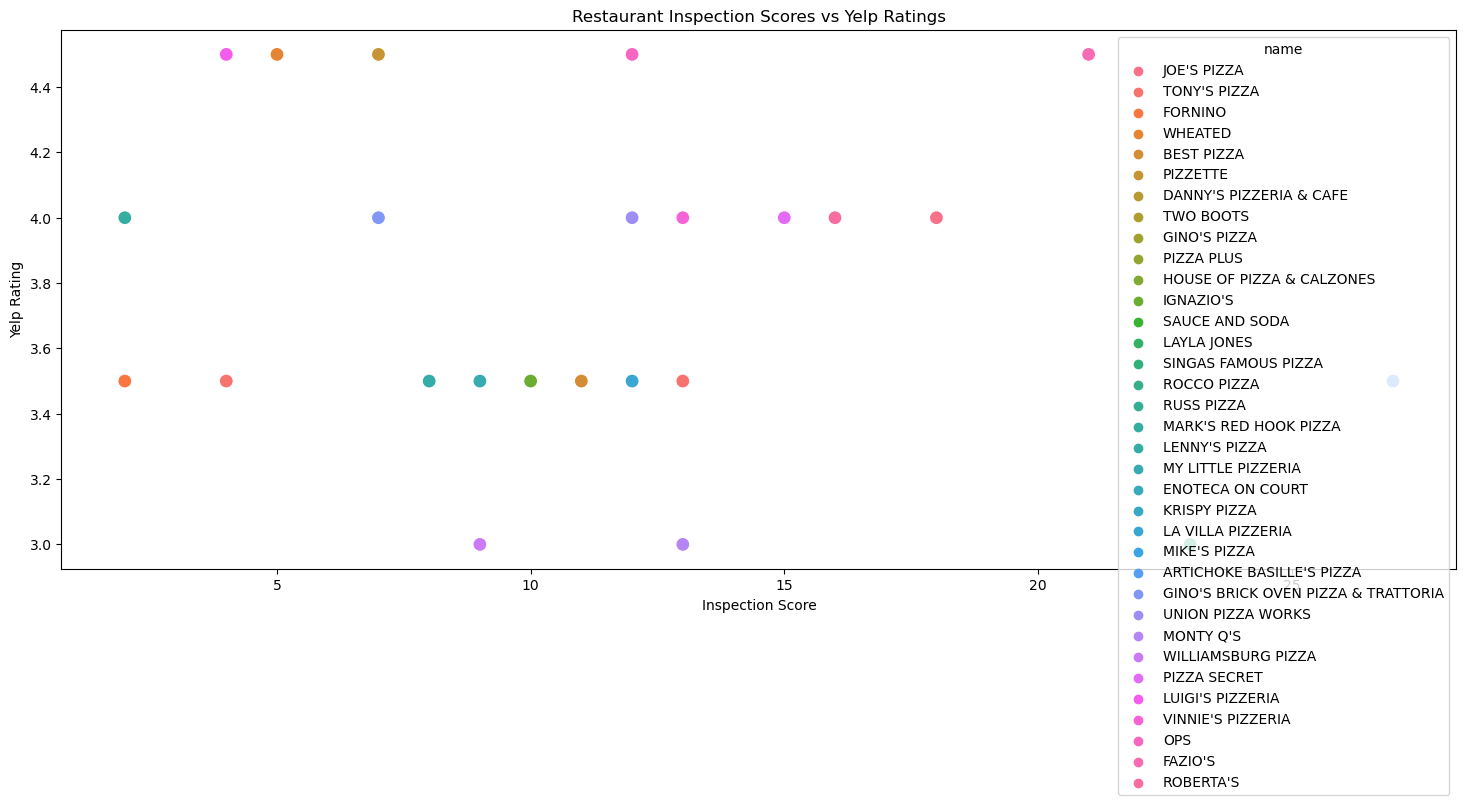

In [31]:
# Plotting
plt.figure(figsize=(18, 7))
sns.scatterplot(x='SCORE', y='rating', data=df_filtered, hue='name', s=100)
plt.title('Restaurant Inspection Scores vs Yelp Ratings')
plt.xlabel('Inspection Score')
plt.ylabel('Yelp Rating')
plt.show()

In [32]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = merged_df[(merged_df['review_count'] >= 200)]

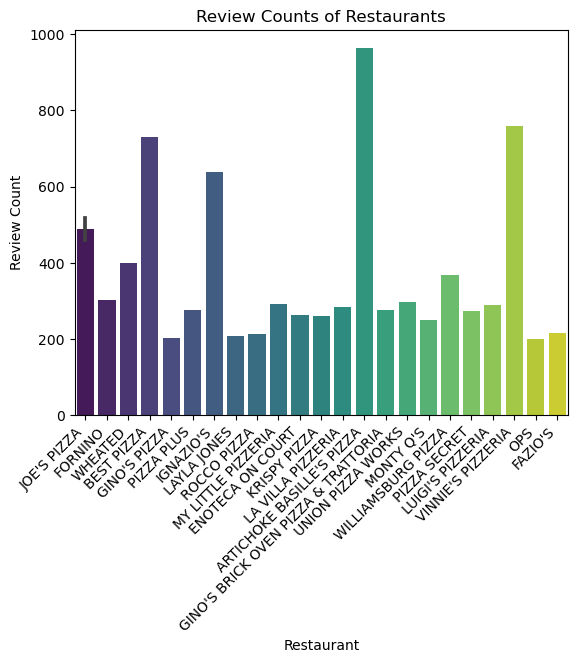

In [33]:
# Bar plot for review counts
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='name', y='review_count', data=df_filtered, palette='viridis')
plt.title('Review Counts of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right');

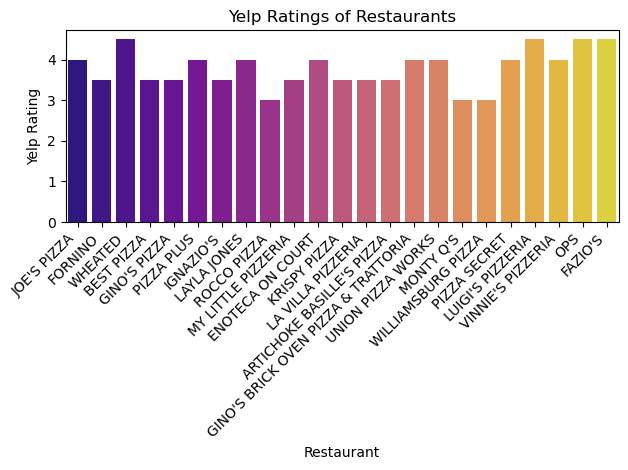

In [34]:
# Bar plot for Yelp ratings
plt.subplot(1, 1, 1)
sns.barplot(x='name', y='rating', data=df_filtered, palette='plasma')
plt.title('Yelp Ratings of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Yelp Rating')
plt.xticks(rotation=45, ha='right')
# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

# **Hypothesis Testing**

## **Hypothesis Test 1:Try to find a correlation between ratings and review counts on YELP**

- The null hypothesis for this question would be that the rating does not significantly affect the number of reviews on Yelp for pizza restaurants in Brooklyn NY

- The alternative hypothesis for this question would be that the rating does significantly affect the number of reviews on Yelp for the pizza restaurants in Brooklyn NY.

In [35]:
# Performing Pearsonr correlation test
correlation, p_value = pearsonr(merged_df['review_count'], merged_df['rating'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: -0.17
P-value: 0.2046
There is no significant correlation.


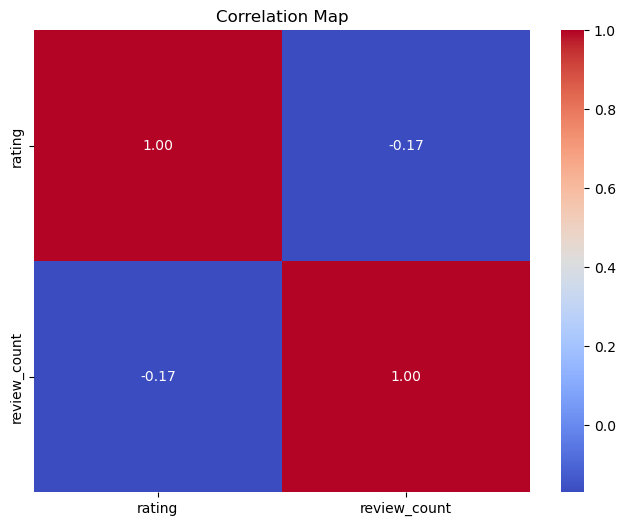

In [36]:
numeric_columns = ['rating', 'review_count']

mdf_numeric = merged_df[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

c_matrix = mdf_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

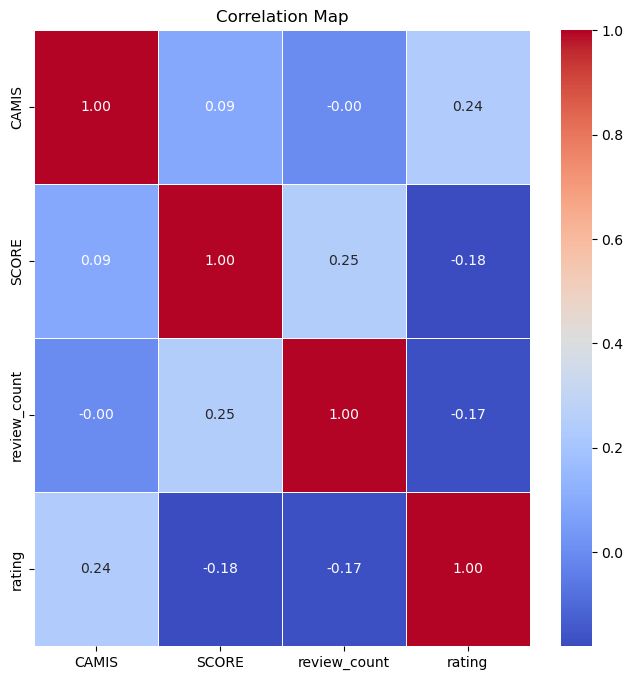

In [37]:
# Computing a correlation matrix to check for any correlation
correlation_matrix = merged_df.corr()

# Plot the correlation heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

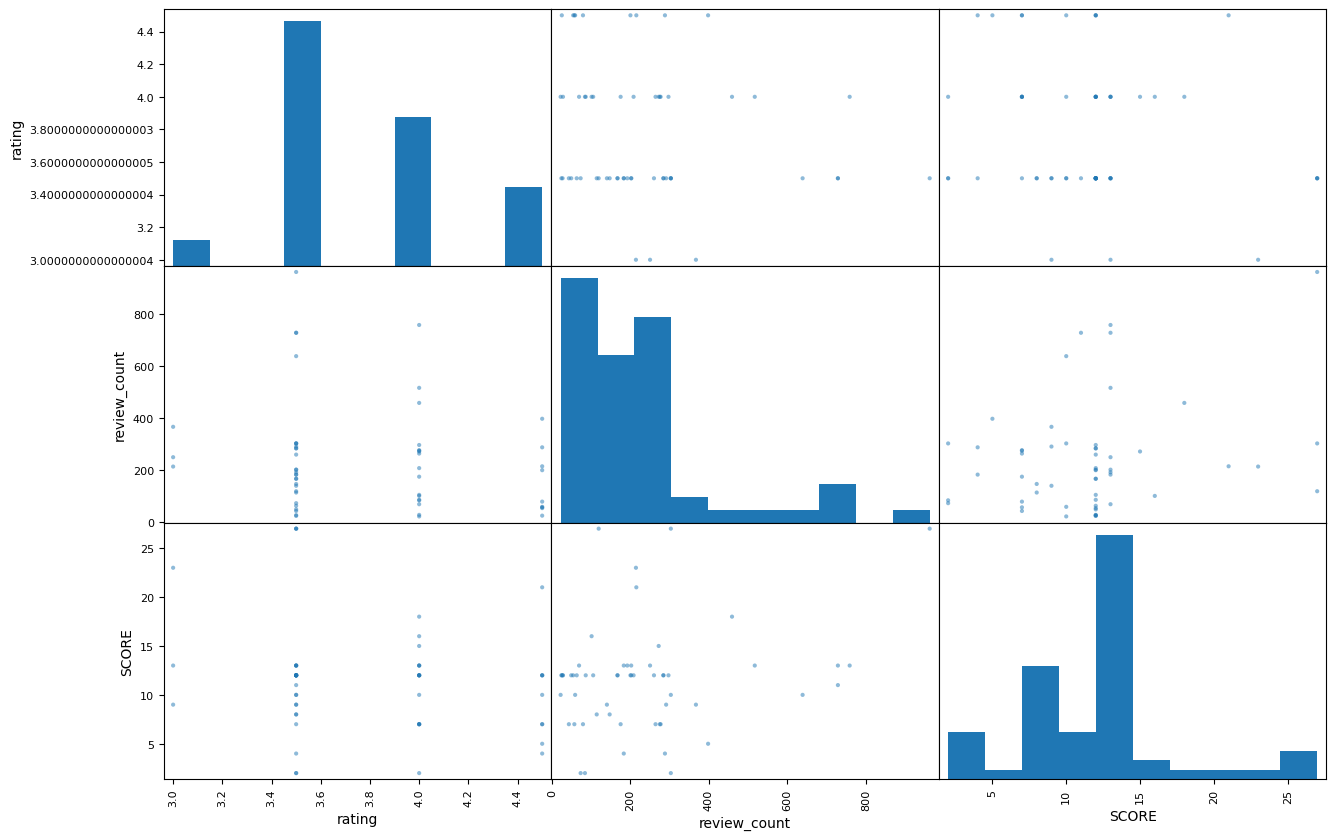

In [38]:
#create a scatter plot matrix for the merged dataframe
pd.plotting.scatter_matrix(merged_df[['rating','review_count', 'SCORE']], 
                           figsize=(15, 10));

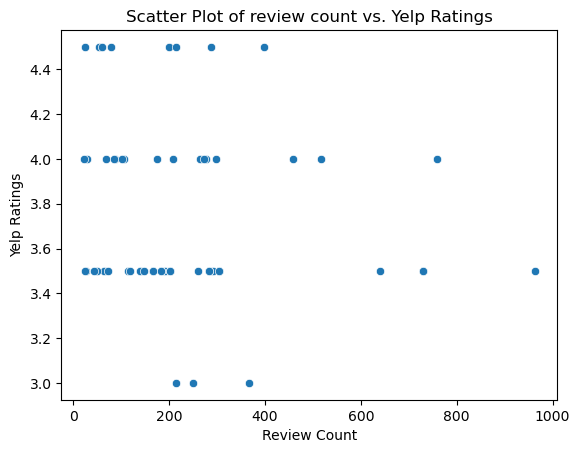

In [39]:
# Visualizing the correlation between review count and Yelp Ratings
sns.scatterplot(x=merged_df['review_count'], y=merged_df['rating'])
plt.title('Scatter Plot of review count vs. Yelp Ratings')
plt.xlabel('Review Count')
plt.ylabel('Yelp Ratings')
plt.show()

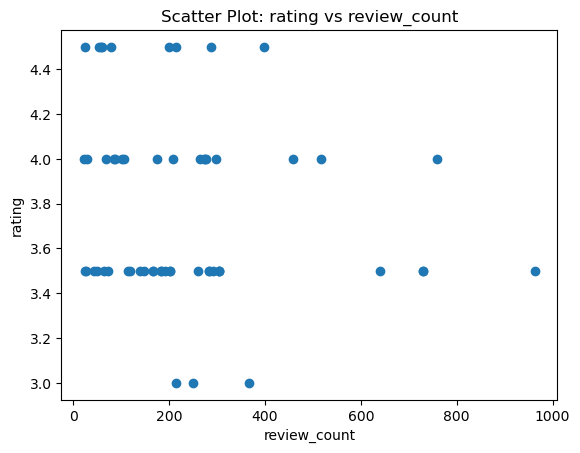

In [40]:
# Scatterplot 
plt.scatter(merged_df['review_count'], merged_df['rating'])
plt.xlabel('review_count')
plt.ylabel('rating')
plt.title('Scatter Plot: rating vs review_count')
plt.show()

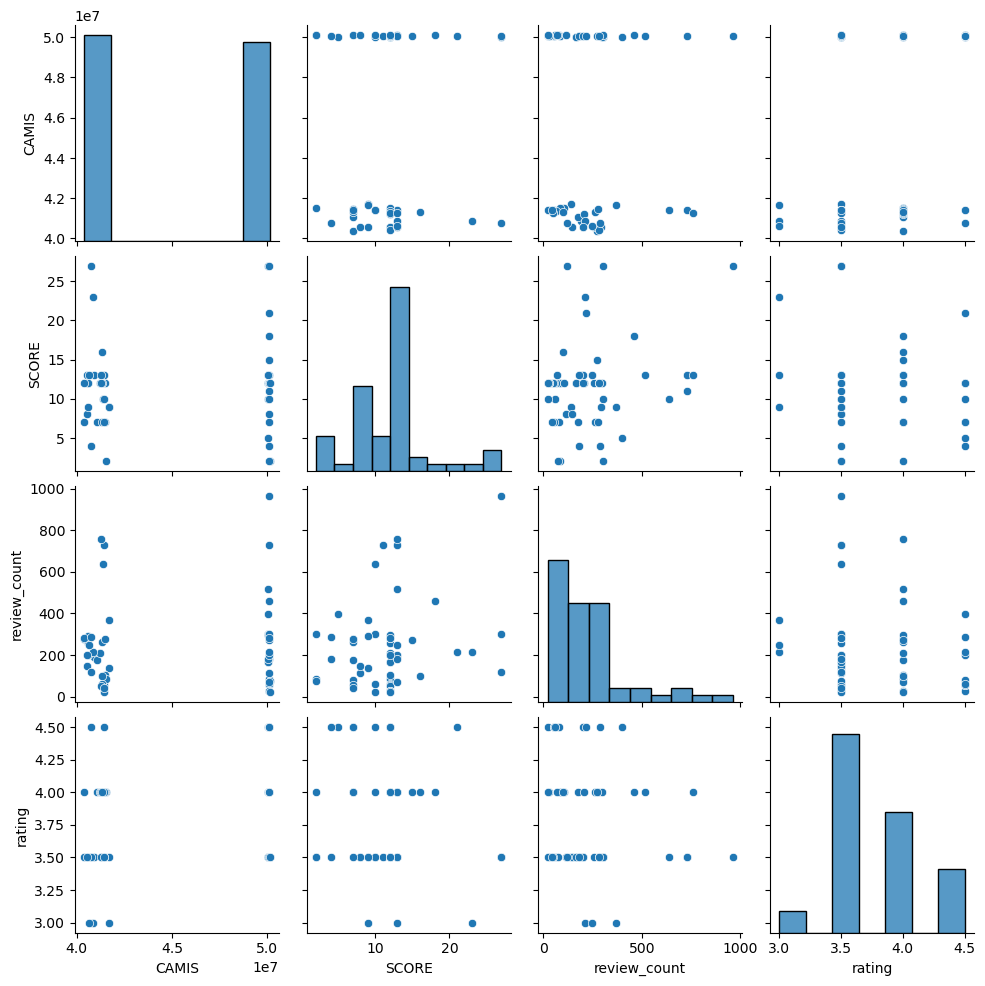

In [41]:
# Pairplot of the merged dataframe
sns.pairplot(merged_df)
plt.show()

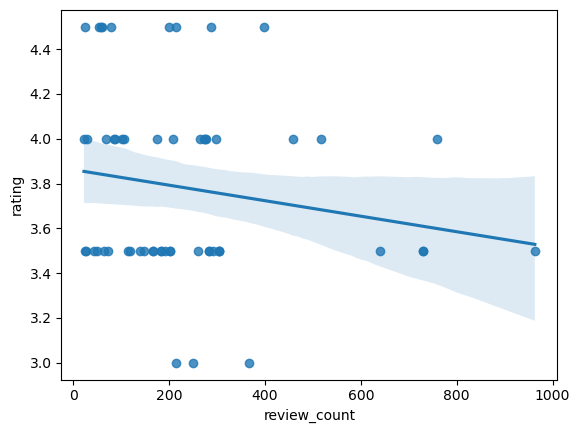

In [42]:
# Reggesion plot
sns.regplot(x='review_count', y='rating', data=merged_df)
plt.show()

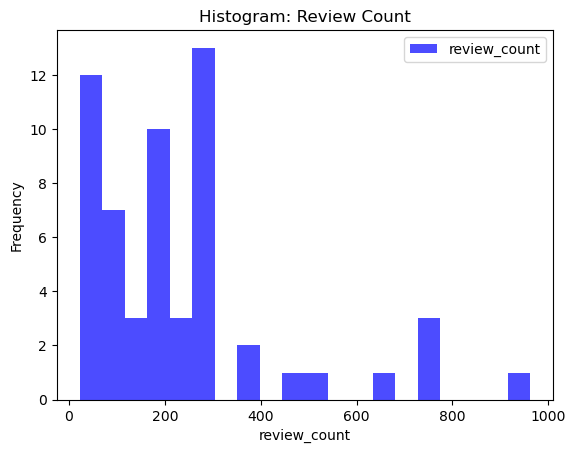

In [43]:
# Histogram 
plt.hist(merged_df['review_count'], bins=20, color='blue', alpha=0.7, label='review_count')
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Histogram: Review Count')
plt.legend()
plt.show()

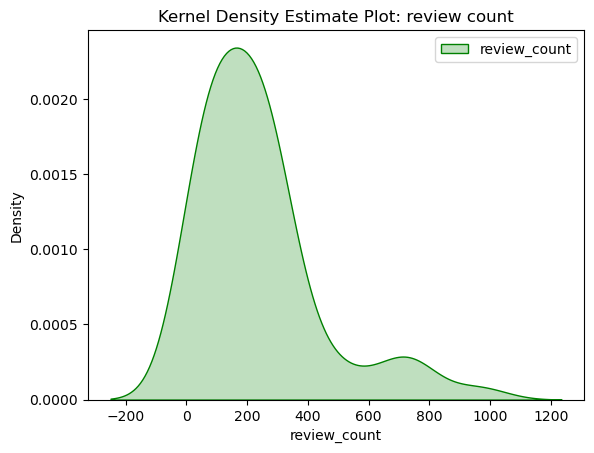

In [44]:
# Kernel Density Estimate Plot
sns.kdeplot(merged_df['review_count'], shade=True, color='green', label='review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot: review count')
plt.legend()
plt.show()

## **Hypothesis Test 2:Try to find correlation between the inspection scores and the review counts on Yelp**

- Null Hypothesis: There is no significant correlation between the inspection score and the review count on Yelp

- Alternative Hypothesis: There is a significant correlation between the inspection score and the review count on Yelp.

In [45]:
review_count = merged_df['review_count']
score = merged_df['SCORE']

# Calculate IQR
Q1 = review_count.quantile(0.25)
Q3 = review_count.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (review_count < Q1 - 1.5 * IQR) | (review_count > Q3 + 1.5 * IQR)

# Print outliers
print("Outliers:")
print(merged_df[outliers])

Outliers:
       CAMIS                        DBA      BORO            STREET  \
4   50056825                 BEST PIZZA  Brooklyn          AVENUE O   
6   41411423                 BEST PIZZA  Brooklyn  HAVEMEYER STREET   
15  41393052                  IGNAZIO'S  Brooklyn      WATER STREET   
31  50057010  ARTICHOKE BASILLE'S PIZZA  Brooklyn          4 AVENUE   
46  41250435          VINNIE'S PIZZERIA  Brooklyn    BEDFORD AVENUE   

   CUISINE DESCRIPTION INSPECTION DATE  \
4                Pizza      02/28/2022   
6                Pizza      03/16/2023   
15               Pizza      05/08/2023   
31               Pizza      09/06/2023   
46               Pizza      12/06/2023   

                                             ACTION VIOLATION CODE  \
4   Violations were cited in the following area(s).            04L   
6   Violations were cited in the following area(s).            08A   
15  Violations were cited in the following area(s).            10F   
31  Violations were cited in t

In [46]:
# Perform Pearson correlation test
if len(merged_df['review_count']) < 2 or len(merged_df['SCORE']) < 2:
    print("Not enough data points to perform the correlation test.")
else:
    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_df['review_count'], merged_df['SCORE'])

    # Print results
    print(f'Correlation: {correlation:.2f}')
    print(f'P-value: {p_value:.4f}')

    # Check for significance based on the p-value
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('There is no significant correlation.')

Correlation: 0.25
P-value: 0.0639
There is no significant correlation.


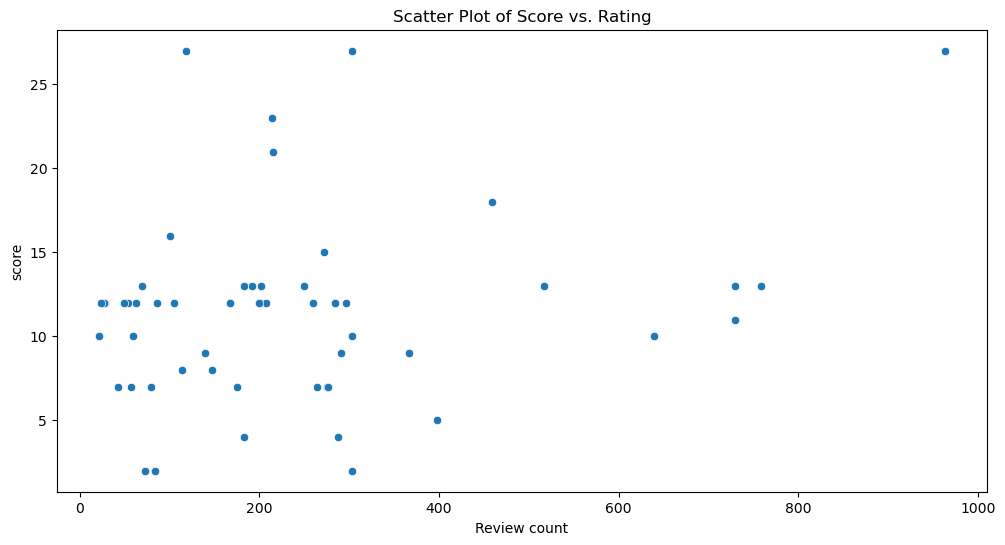

In [47]:
# Scatter Plot compairing review counts with inspection scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_count', y='SCORE', data=merged_df)
plt.title('Scatter Plot of Score vs. Rating')
plt.xlabel('Review count')
plt.ylabel('score')
plt.show()

## **Hypothesis Test 3:Try to find correlation between the inspection scores and the ratings on Yelp**

- Null Hypothesis: There is no significant correlation between the inspection scores and the ratings on Yelp.

- Alternative Hypothesis: There is a significant correlation between the inspection scores and the ratings on Yelp.

In [48]:
# Perform Pearson correlation test
if len(merged_df['rating']) < 2 or len(merged_df['SCORE']) < 2:
    print("Not enough data points to perform the correlation test.")
else:
    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_df['rating'], merged_df['SCORE'])

    # Print results
    print(f'Correlation: {correlation:.2f}')
    print(f'P-value: {p_value:.4f}')

    # Check for significance based on the p-value
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('There is no significant correlation.')

Correlation: -0.18
P-value: 0.1798
There is no significant correlation.


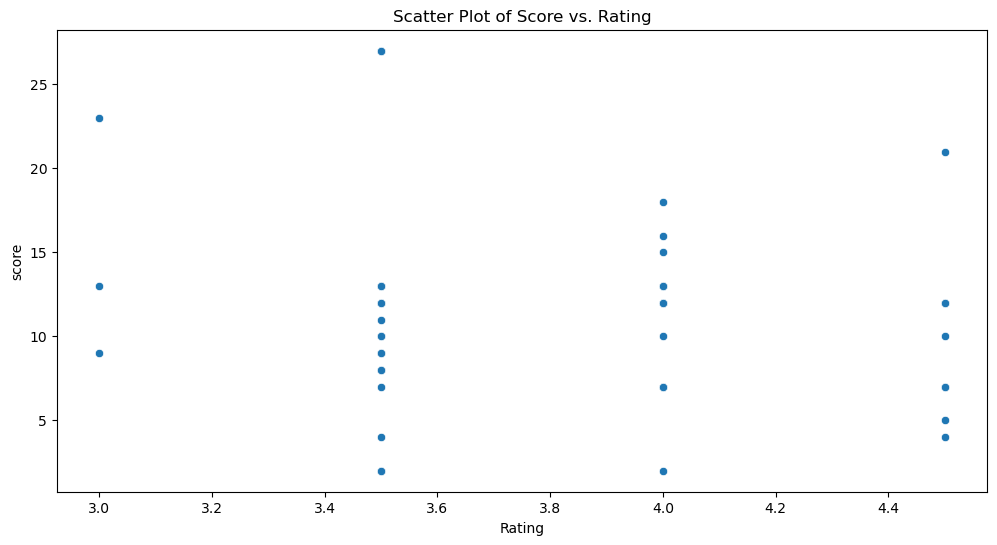

In [49]:
# Scatter Plot compairing review counts with inspection scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rating', y='SCORE', data=merged_df)
plt.title('Scatter Plot of Score vs. Rating')
plt.xlabel('Rating')
plt.ylabel('score')
plt.show()

# **Summary of Hypothesis Testing results**



In this notebook, we conducted multiple hypothesis tests to explore potential correlations between ratings and review counts, and inspection scores and review counts. Despite our efforts, none of the tests revealed statistically significant correlations between the variables under investigation. So as far as Pizza restaurants in Brooklyn, NY, there is no correlation that supports a theory of better inspection scores mean better ratings on YELP.